In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/sonamaria/Documents/Resume/Eesho/PROJECTS/sparks_project1/hours_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
##scatter plot

Text(0, 0.5, 'Scores')

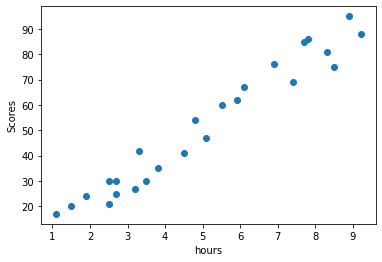

In [6]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("hours")
plt.ylabel("Scores")

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


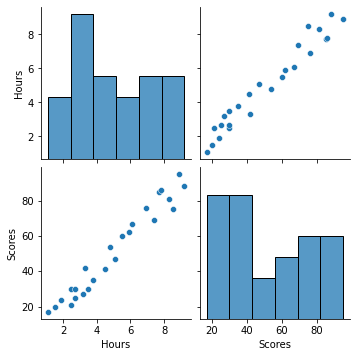

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
##independent and dependent features

In [14]:
x = df[['Hours']]
y = df['Scores']

In [15]:
##train-test split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
x_train.shape

(18, 1)

In [19]:
##standardization
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [22]:
x_test=scaler.transform(x_test)

In [24]:
x_test

array([[ 1.22741366],
       [-1.05269286],
       [-1.05269286],
       [ 0.67704312],
       [ 0.28392131],
       [-0.9740685 ],
       [-0.73819541]])

In [23]:
##apply simple linear regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression(n_jobs=-1)

In [27]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [28]:
regression.coef_

array([24.7101327])

In [29]:
regression.intercept_

52.77777777777778

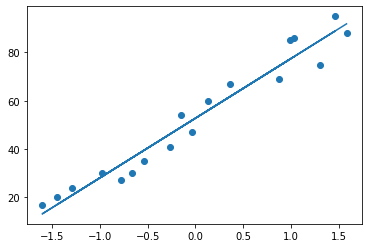

In [31]:
##plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [32]:
##prediction for test data

In [33]:
y_pred=regression.predict(x_test)

In [35]:
##performance metrics

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


23.516396034595225
4.425394675156181
4.8493706843873285


In [38]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(y_test,y_pred)

In [40]:
score

0.9553509219739938

In [41]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9464211063687926

In [42]:
##OLS Linear Regression

In [43]:
import statsmodels.api as sm

In [44]:
model=sm.OLS(y_train,x_train).fit()

In [46]:
prediction=model.predict(x_test)
print(prediction)

[ 30.32955451 -26.0121802  -26.0121802   16.72982544   7.01573325
 -24.06936177 -18.24090645]


In [47]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              3.685
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                      0.0718
Time:                        17:20:36   Log-Likelihood:                         -97.031
No. Observations:                  18   AIC:                                      196.1
Df Residuals:                      17   BIC:                                      197.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
## prediction for new data

In [50]:
regression.predict(scaler.transform([[9.25]]))

array([92.33571987])